In [48]:
import torch
from torchvision import transforms
from tensorflow import keras
import torch.nn as nn
from PIL import Image
import numpy as np

import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline


In [49]:
class DCGAN(nn.Module):
    def __init__(self, channels_noise, channels_img, features_g):
        super().__init__()
        self.gen = nn.Sequential(
            # Input: N x channels_noise | 1 x 100
            self._block(channels_noise, features_g * 32, 7, 1, 0),  # img: 7x7x896
            self._block(features_g * 32, features_g * 16, 4, 2, 1),  # img: 14x14x448
            self._block(features_g * 16, features_g * 8, 3, 1, 1),  # img: 14x14x224
            self._block(features_g * 8, features_g * 4, 3, 1, 1),  # img: 14x14x112
            nn.ConvTranspose2d(
                features_g * 4, channels_img, kernel_size=4, stride=2, padding=1
            ),
            # Output: N x channels_img | 28x28x1
            nn.Tanh(),
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.gen(x)

In [4]:
dcgan_dir = '/content/drive/MyDrive/Projects/models/PytorchDCGAN20.pth'

def load_models():
    device = torch.device('cpu')
    dcgan = DCGAN(100, 1, 28)
    dcgan.load_state_dict(torch.load(dcgan_dir,
                        map_location=device))
    dcgan.eval()
    return dcgan

In [8]:
dcgan = load_models()

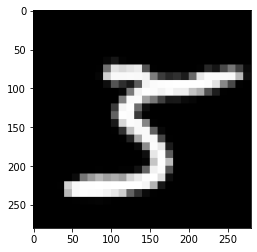

In [72]:
noise = torch.randn(1, 100, 1, 1)
fake = dcgan(noise)
fake = fake.reshape(28, 28, 1).detach().numpy().squeeze()
fake = (fake - np.min(fake))/np.ptp(fake)
fake = Image.fromarray(fake)
fake = fake.resize((280, 280), resample=Image.NEAREST)
imshow(np.array(fake), 
       cmap='gray')